<a href="https://colab.research.google.com/github/cyrus2281/notes/blob/main/MachineLearning/Recommenders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommenders

>[Recommenders](#scrollTo=COYGNbvomdLn)

>>[Mathematical Recommenders](#scrollTo=X7LG4JFYmfH9)

>>>[Lift](#scrollTo=-NPdgLKNkwA2)

>>>[Hacker News Formula](#scrollTo=bNo3EqUbmjRp)

>>>[Reddit Formula](#scrollTo=OX9Eah-ppQoq)

>>>[Google Page Rank](#scrollTo=cCDmUR3Fp0YC)

>>>>[Markov Models](#scrollTo=bIU2zR8LtEfH)

>>>>[Transition Probability Matrix](#scrollTo=UENDikH0tHHt)

>>>>[Calculating Probabilities](#scrollTo=Cbn1ogLEtKl_)

>>>>[Beta Posterior Mean](#scrollTo=-PvC0vn1xck2)

>>>>[State Distribution](#scrollTo=pS0RySi_1Ecy)

>>>>[PageRank](#scrollTo=Q640uQxg3_sJ)

>>[Statistics](#scrollTo=Ivwe3u2lzHp3)

>>>[Smoothing (Dampening)](#scrollTo=S34-RUx8zI_f)

>>>[Explore-Exploit Dilemma](#scrollTo=gahD3CwG1XEv)

>>>[Bayesian Method](#scrollTo=N4WrwUfO6MUp)

>>[Collaborative Filtering](#scrollTo=biqlBm7295Kg)

>>>[Sparsity](#scrollTo=VHSIzt7MLEya)

>>>[Regression](#scrollTo=pmcJqzBwNcuy)

>>>[User-User Collaborative Filtering](#scrollTo=XlrdEcfgxdmH)

>>>>[Pearson Correlation Coefficient](#scrollTo=LJzwxoPl2ayu)

>>>>[Cosine Similarity](#scrollTo=B2ZTwhaW4o-v)

>>>>[Python Implementation](#scrollTo=7fXxflLq7YCc)

>>>[Item-Item Collaborative Filtering](#scrollTo=RVJUmoIsVf11)

>>>>[Python Implementation](#scrollTo=QSNW575oXYDB)

>>>[Comparison](#scrollTo=-Hewxxx2C7sS)

>>[Matrix Factorization](#scrollTo=LPgwQOSzPfEH)

>>>[Sparse representation](#scrollTo=txxT6ymhSNL9)

>>>[SVD](#scrollTo=tqVBGCMWStEn)

>>>>[Dimensionality Reduction](#scrollTo=V3TKC_wIeg2E)

>>>>[MF vs SVD](#scrollTo=xC-qr1Jrc0NZ)

>>>[Training](#scrollTo=FYoCYIFskzXP)

>>>>[Altering Least Squares](#scrollTo=ywYS29A_qfmu)

>>>>[Bias Terms](#scrollTo=CBe12epTbcXS)

>>>>[Regularization](#scrollTo=ruhEy0yMldCF)

>>>>>[Regularization in Matrix Factorization](#scrollTo=1_18KD9CnEk6)

>>>[Python Implementation](#scrollTo=3LVneg7_sZYm)

>>>[Probabilistic Matrix Factorization](#scrollTo=K5DWDURXkhdy)

>>>>[Maximum likelihood estimation](#scrollTo=eE01L_Zvg_2x)

>>>>[MAP Estimation](#scrollTo=RQn4tCIiht_2)

>>>[Bayesian Matrix Factorization](#scrollTo=-hHAwlHKpGgM)

>>>[Keras Implementation](#scrollTo=2LkBa6UxyVPO)

>>>>[Matrix Factorization Keras](#scrollTo=AVZxznol1nQj)

>>>>[Deep Learning Keras - Dense](#scrollTo=LhA72a6G2Ao4)

>>>>[Deep Learning Keras - Residuals](#scrollTo=-VG8MuVN4nRh)

>>[AutoRec](#scrollTo=Q-2Mgca6V8gu)

>>>[Calculating Cost](#scrollTo=cNr-nKVAaM61)

>>>[Python Implementation](#scrollTo=W0jRn7Yuav_f)

>>[RBMs](#scrollTo=cREtuwmsT8qY)

>>>[Bernoulli RBMs](#scrollTo=gB2VvyGwWqtj)

>>>>[Calculation RBM](#scrollTo=m48LycHPdNFb)

>>>>[Boltzmann Machines](#scrollTo=r7vbYYjudTLk)

>>>>>[Training a Boltzmann Machine](#scrollTo=PvydCuqfpzDc)

>>>[Intractability](#scrollTo=jVwDYapJt8mU)

>>>[RBM Formula](#scrollTo=a0KU2AadvMKU)

>[Resources](#scrollTo=IiWhdb8CU7jE)



In [ ]:
*# Adjust depending large directory location
# https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset

# LARGE_FILE_DIR  = "MachineLearning/notes/large_files"
LARGE_FILE_DIR  = "./"
!unrar x  ./data.rar

## Mathematical Recommenders

These examples are non-personalized recommendations


### Lift

$$
\text{Lift} = \frac{p(A,B)}{p(A)p(B)} = \frac{p(A|B)}{p(A)} = \frac{p(B|A)}{p(B)}
$$

- Symmetric
- If A and B are independent, then $p(A|B) = p(A)$
  - $p(A|B) / p(A) = 1$
- if increasing the probability of B increases the probability of A, then Lift > 1

### Hacker News Formula

Balancing Popularirty with Age

$$
\frac{f(\text{popularity})}{g(\text{age})} \\[1cm]
$$

$$
\text{score} = \frac{(\text{ups} - \text{downs} -1 )^{0.8}}{(\text{age}+2)^{\text{gravity}}} \times \text{penalty}
$$

- gravity = 1.8
- penalty = multiplier to implement "business rules" (e.g. penalize self-posts, "controversial" posts, + many more rules)

\

age starts from 2, to prevent division by zero

exponent of numerator is bigger than the exponent of the denominator, meaning denominator grows faster.

Age always overtakes popularity

\

exponent 0.8 causes sublinear growth.
meaning 0 → 100 worth more than 1000 → 1100



### Reddit Formula

$$
\text{score} = \text{sign}(\text{ups}-\text{down}) \times \log \{ \max(1, |\text{ups} - \text{downs}|) \} + \frac{\text{age}}{45000}
$$

- log of the absoulte value of net votes - sublinear curve - initial votes matter more - max since log 0 is not possible

\

- can be positive or negative
  - The more downvotes you get, the futher your score goes down

\

- age is in seconds from inception of reddit
- age is always positive
- newer links → more score
- reddit scores will forever increase linearly


### Google Page Rank

Logic: The page rank of a page is the probability I would end up on that page if I surfed the internet randomly for an infinite amount of time



#### Markov Models

- Simplest way to think about Markov Models are bigrams from NLP
- Build a probablistic language model
- Can ask "what is the probability of the next word in the sentence 'love' give the previous word was 'I'?" i.e., p(love | I )

**Bigrams**

- It's a bigram because we only consider 2 words at a time

We don't have to think of each item as a word, just a generic state: $x(t)$

"Markov" means $x(t)$ doesn't depend on any values 2 or more steps behind, only the immediate last value.
$$
p(x_t | x_{t-1}, x_{t-2}, \cdots, x_1) = p(x_t | x_{t-1})
$$



#### Transition Probability Matrix

- $A(i,j)$ tells use the probability of going to state j from state i
$$
A(i,j) = p(x_t = j | x_{t-1} = i )
$$

- Key: rows must sum to 1
    - Since it's a probability this must be true
    - If true, A is called a "stochastic matrix" or "Markov Matrix"
$$
\sum^M_{j=1}A(i,j) = \sum^M_{j=1}p(x_t=j|x_{t-1}=i) =1
$$


\

Example:

Weather is
- state 1 = Sunny
- state 2 = Rainy

Suppose:
- p( sunny | sunny ) = 0.9
- p( sunny | rainy ) = 0.1
- p( rainy | sunny ) = 0.1
- p( rainy | rainy ) = 0.9



#### Calculating Probabilities

$$
p(\text{rainy} | \text{sunny}) = \frac{\text{count}(\text{sunny} \rightarrow \text{rainy})}{\text{count}(\text{sunny})}
$$

Generalized

$$
p(B|A) = \frac{\text{count}(A \rightarrow B)}{\text{count}(A)}
$$

Now probability of a sentence would be

$$
p(x_1, \cdots, x_T) = p(x_1) \prod^T_{t=2} p(x_t | x_{t-1})
$$

Problem: If a bigram didn't apear in the train set, the probility would be 0 and anything × 0 is 0.

**Add-1 Smoothing**

$$
p(x_t=j|x_{t-1}=i) = \frac{\text{count}(i \rightarrow j)+\epsilon}{\text{count}(i)+\epsilon V} \\
$$

- Add a "fake count" to every possible bigram
  - ϵ can be any value, for example 1.
- V = Vocabulary size = number of unique words in dataset
- In this case, V=M (number of states) since each state is a word


e.g. p(and | and) never occurs but would get positve probability


#### Beta Posterior Mean

In our case, the equation is the beta posterior mean instead of only 2 possible outcomes, V possible outcomts

$$
E(\pi) = \frac{\alpha'}{\alpha'+\beta'} = \frac{\alpha+(\sum_{i=1}^N X_i)}{\alpha + \beta + N} \\
$$

#### State Distribution

$\pi_t$ = state probability distribution at time t

$\pi(t)$ is a row vector by convention

For the weather example,

$$
\pi_t = [p(x_t = \text{sunny}), p(x_t = \text{rainy})]
$$

**Future State Distribution**

Calculating the $\pi(t+1)$ use Bayes rule

$$
p(x_{t+1} = j) = \sum^M_{i=1} p(x_{t+1} = j, x_t =i) \\
= \sum^M_{i=1} p(x_{t+1}=j | x_t = i) p(x_t = i) \\
= \sum^M_{i=1} A(i,j)\pi(i) \\
= \pi_{t+1}(j)
$$

Since A is a matrix and $\pi(t)$ is a vector, we can express it in terms of matrix math
$$
\pi_{x+1}(j) = \sum^M_{i=1} A(i,j)\pi_t(i) \\
\pi_{t+1} = \pi_t A
$$

Further future

$$
\pi_{t+2} = \pi_t A^2 \\
\pi_{t+k} = \pi_t A^k \\
$$

For infinity

$$
\pi_\infty = \lim_{t\rightarrow \infty} \pi_0 A^t \\
\pi_\infty = \pi_\infty A
$$

This is just the eigenvalue problem
  - Give matrix A, find a vector and a scalar s.t. multiplying the vector by A is equivalent to stretching it be the scalar.

#### PageRank

Every page on the internet is a state in a Markov Model

The transition probablity is distributed equally amongst all links on a page
- p(dlc.com | lp.me ) = 0.5
- p(yt.com | lp.me ) = 0.5

In general, we can write the transition probability as:

$$
p(x_t =j | x_{x-1} = i) = \frac{1}{n(i)}
$$
if $i$ links to $j$, $n(i) = $ number of links on page $i$, otherwise $0$.

**Smoothing**

$$
G = 0.85A + 0.15U \\
U(i,j) = \frac{1}{M} \\
\forall i,j = 1 \dots M
$$

Find the limiting distribution of G - yields a vector of length M - these probabilities are the respective PageRanks for ech page on the internet

$$
\pi_\infty = \pi_\infty G
$$


**Perron-Frobenius Theorem**:
> If G is a valid Markov matrix and all its elements are positive then the stationary distribution and limiting distribution are the same
- Limiting Distribution: state distribution you'd arrive at after transitioning by G an infinite number of times
- Stationary Distribution: a state distribution that does not change after transitioning by G

## Statistics

### Smoothing (Dampening)

To resolve the issue of 0 in sample data when getting mean

$$
r = \frac{\sum^N_{i=1} X_i + \lambda \mu_0}{N+\lambda}
$$


- $\lambda$ some random small non-zero number
- $\mu_0$ the global avergage or just some middle value

\

For example:
- 1000 reviews of 4 star - μ = 3 - λ = 1 → 3.999
- 5 reviews of 4 star - μ = 3 - λ = 1 → 3.83
- 1 review of 4 star - μ = 3 - λ = 1 → 3.5

### Explore-Exploit Dilemma

Example 1

Imagine we want to find the slot machine with the highest win rate among 10 slot machines.

Traditional statistical test can tell us whether or not there's a significant difference between win rates between machines.

If playing each machine 100 times, meaning 1000 turns total, 900 (9/10) turns yielded a suboptimal reward.

Hence the dilemma, Play more or play less!


---

Example 2

Watching a bunach of YouTube videos on how to make eggs.

Now your reccomendations are filled with videos about making eggs

porbably suboptimal - once I've figured out how to make eggs, I don't want to watch more egg videos.

YouTube is not exploiting the fact that I watched eggs video and not exploring other topics

Should there be a stronger exploration component?

Maybe I'd like to seE movie trailers or machine learning videos

---

How do we strike a balance between these 2 opposing forces?

Smoothed average gives us one part of the solution

Making good things look worse and bad things look better


### Bayesian Method

Bayesian method automatically balances need to explore and exploit

- 2 fat distributions: explore both (totally random ranking)
- 2 skinny distributions: exploit both (nearly deterministic ranking)
- Mixed: explore and exploit co-exit


Completely automatic - does not require A/B testing



## Collaborative Filtering

Non-specific to any particular user, Score each item from 1 to M a number.

Basic algorithm is to make s(j) the average rating for j

$$
s(j) = \frac{\sum_{i \in \Omega_j} r_{ij}}{|\Omega_j|} \\
$$

- $\Omega_j$ = set of all users who rated item j
- $r_{ij}$ = rating user i gave item j

Translates to, average rating for a product is the sum of rating divided by the number of the ratings.

**Personalize the score**

s(i,j) can depend both on user i and item j

$$
s(i,j) = \frac{\sum_{i' \in \Omega_j} r_{i'j}}{|\Omega_j|} \\
$$

i' is just an index

i = 1 … N, N = number of users

j = 1 … M, M = number of items

$R_{N\times M}$ = user -item ratings matrix of size N × M


\

- User-item matrix is reminiscent of term-document.
- X(t,d) = # of time term t appears in document d
- In terms of recommender systems, can think of X(t,d) as "how much does t like the item d"




### Sparsity

One characteristic of the user items matrix that makes it unique to recommender systems is that it's Sparse.

- Term-document matrix is sparse because most entries are 0
- User-item matrix is sparse because most entries are **empty**

The average user does not interact with all items.


**Goal of Collaborative Filtering**

- Most of r(i,j) doesn't exist - this is good.

If every user has seen every item, then there's nothing to recommend

Goal:
> We want to guess what you might rate an item you haven't seen yet

$$
s(i,j) = \hat r (i,j) = \text{ guess what user i might rate item j}
$$

E.g. if we think you might rate some move a 5, we definitely want you to watch that movie.


### Regression

Since this is a regression probelm, the evaluation metric is going to be the mean squared error.

Outline:
- user-user collaborative filtering
- item-item collaborative filtering

$$
\text{MSE} = \frac{1}{|\Omega|} \sum_{i,j \in \Omega}(r_{ij} - \hat r_{ij})^2
$$

Ω = set of pairs (i,j) where user i has rated item j

we're going to take our models predicted ratings, compare them to the actual ratings, square the difference and then take the average of those squared differences

### User-User Collaborative Filtering

||item 1 | item2 | ... | item n |
|--|--|--|--|--|
|user 1| score |score | ... |score |
|user 2| score |score | ... |score |
| ... | ... |... | ... |... |
|user n| score |score | ... |score |

Comparing rows together, if 2 rows are very similar, it can be concluded that they have similar taste


Average Rating reminder
$
s(i,j) = \frac{\sum_{i'\in \Omega_j} r_{i'j}}{|\Omega_j|}
$

It treats everyone's rating of the items equally

User 1's s(i,j) equally depends on user 2 rating and user 3 rating. even though user 1 doesn't agree with user 2.


**Weighting Ratings**

To make it small for users who don't agree and large for users who do agree

$$
s(i,j) = \frac{\sum_{i'\in \Omega_j} w_{ii'} r_{i'j}}{\sum_{i'\in\Omega_j} w_{ii'}} \\
$$

Users can be biased, optimistic or perstimistic.

**Deviation**

Don't care about your absolute rating, but how much it deviates from your own average.
- if your average is 2.5, but you rate something 5, it must be really great
- if you rate everything a 5, it's diffcult to know how those items compare

$$
\text{dev}(i,j) = r(i,j) - \bar r_i, \text{ for a known rating}
$$

My predicted rating is my own average + predicted deviation

$$
\hat{\text{dev}}(i,j) = \frac{1}{|\Omega_j|}\sum_{i'\in \Omega_j} r(i',j) - \bar r_{i'} \\
$$

For a prediction from known ratings

$$
s(i,j) = \bar r_i + \frac{1}{|\Omega_j|}\sum_{i'\in \Omega_j} r(i',j) - \bar r_{i'} \\
= \bar r_i + \hat{\text{dev}}(i,j) \\
$$

Note: In order to make recommendation, I don't need to add back the average, because it's the same over all items

**Combine**

Combine the idea of deviations with the idea of weightings to get our final formula

$$
s(i,j) = \bar r_i + \frac{\sum_{i'\in \Omega_j} w_{ii'} \{ r_{i'j} - \bar r_{i'} \}}{\sum_{i'\in \Omega_j} |w_{ii'}|}  \\
$$

How to calculate wieghts

#### Pearson Correlation Coefficient

$$
\varrho_{xy} = \frac
{\sum^N_{i=1} (x_i -\bar x)(y_i - \bar y)}
{
  \sqrt{\sum^N_{i=1} (x_i - \bar x)^2 }
  \sqrt{\sum^N_{i=1} (y_i - \bar y)^2 }
}
$$

Our data is sparse, meaning we have a lot of missing data.

Update formula:

$$
w_{ii'} = \frac
{\sum_{j\in \Psi_{ii'}} (r_{ij} -\bar i_i)(r_{i'j} - \bar r_{i'})}
{
  \sqrt{\sum_{j\in \Psi_{ii'}} (r_{ij} -\bar i_i)^2 }
  \sqrt{\sum_{j\in \Psi_{ii'}} (r_{i'j} -\bar i_{i'})^2 }
}
$$

- $\Psi_i$ = set of items that user i has rated
- $\Psi_{ii'}$ = set of items that user i and i' have rated
- $\Psi_{ii'} = \Psi_i \cap \Psi_{i'}$

#### Cosine Similarity

$$
\cos \theta = \frac{x^Ty}{|x| \ |y|} = \frac
{\sum_{i=1}^N x_iy_i}
{
  \sqrt{\sum_{i=1}^N x_i^2 }
  \sqrt{\sum_{i=1}^N y_i^2 }
} \\
$$

They are the same, execpt pearson is centered.

We want to center them anyway because we're working with deviations, not absolute ratings


\

If 2 users have zero or very few items in common, we don't want to consider them in the calculation

**Neighborhood**

In practice, don't sum over all users who rated item j (takes too long)

- It can help to precompute weights beforehand
- Instead of summing over all users, take the ones with highest weight
  - E.g. use K nearest neighbors, K=25 upto 50

\

In Summary,
Discard users w/ no items in common, or few items. Keep only users whose weights are high

#### Python Implementation

Outline
- Split data into train and test sets
- Calculate weightsss using train set
- Make a predict function, e.g. score ← predict(i,j)
- Output MSE for train and test sets


Data fetched from [MovieLens 20M Dataset](https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset) - File `rating.csv`

Parsing IDs

In [ ]:
import pandas as pd

df = pd.read_csv(LARGE_FILE_DIR + "/rating.csv")

# note:
# user ids are ordered sequentially from 1..138493
# with no missing numbers
# movie ids are integers from 1..131262
# NOT all movie ids appear
# there are only 26744 movie ids

# make the user ids go from 0...N-1
df.userId = df.userId - 1

# create a mapping for movie ids
unique_movie_ids = set(df.movieId.values)
movie2idx = {}
count = 0
for movie_id in unique_movie_ids:
  movie2idx[movie_id] = count
  count += 1

# add them to the data frame
# takes awhile
df['movie_idx'] = df.apply(lambda row: movie2idx[row.movieId], axis=1)

df = df.drop(columns=['timestamp'])

df.to_csv(LARGE_FILE_DIR + '/edited_rating.csv', index=False)

Shrinking data size

In [ ]:
import numpy as np
from collections import Counter

# load in the data
df = pd.read_csv(LARGE_FILE_DIR + '/edited_rating.csv')
print("original dataframe size:", len(df))

N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies

user_ids_count = Counter(df.userId)
movie_ids_count = Counter(df.movie_idx)

# number of users and movies we would like to keep
n = 10000
m = 2000

user_ids = [u for u, c in user_ids_count.most_common(n)]
movie_ids = [m for m, c in movie_ids_count.most_common(m)]

# make a copy, otherwise ids won't be overwritten
df_small = df[df.userId.isin(user_ids) & df.movie_idx.isin(movie_ids)].copy()

# need to remake user ids and movie ids since they are no longer sequential
new_user_id_map = {}
i = 0
for old in user_ids:
  new_user_id_map[old] = i
  i += 1
print("i:", i)

new_movie_id_map = {}
j = 0
for old in movie_ids:
  new_movie_id_map[old] = j
  j += 1
print("j:", j)

print("Setting new ids")
df_small.loc[:, 'userId'] = df_small.apply(lambda row: new_user_id_map[row.userId], axis=1)
df_small.loc[:, 'movie_idx'] = df_small.apply(lambda row: new_movie_id_map[row.movie_idx], axis=1)
# df_small.drop(columns=['userId', 'movie_idx'])
# df_small.rename(index=str, columns={'new_userId': 'userId', 'new_movie_idx': 'movie_idx'})
print("max user id:", df_small.userId.max())
print("max movie id:", df_small.movie_idx.max())

print("small dataframe size:", len(df_small))
df_small.to_csv(LARGE_FILE_DIR + '/small_rating.csv', index=False)

original dataframe size: 20000263
i: 10000
j: 2000
Setting new ids
max user id: 9999
max movie id: 1999
small dataframe size: 5392025


Creating user-movie-rating data structures

In [ ]:
import pickle
import pandas as pd
from sklearn.utils import shuffle


df = pd.read_csv(LARGE_FILE_DIR + '/small_rating.csv')

N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies

# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

# a dictionary to tell us which users have rated which movies
user2movie = {}
# a dicationary to tell us which movies have been rated by which users
movie2user = {}
# a dictionary to look up ratings
usermovie2rating = {}
print("Calling: update_user2movie_and_movie2user")
count = 0
def update_user2movie_and_movie2user(row):
  global count
  count += 1
  if count % 100000 == 0:
    print("processed: %.3f" % (float(count)/cutoff))

  i = int(row.userId)
  j = int(row.movie_idx)
  if i not in user2movie:
    user2movie[i] = [j]
  else:
    user2movie[i].append(j)

  if j not in movie2user:
    movie2user[j] = [i]
  else:
    movie2user[j].append(i)

  usermovie2rating[(i,j)] = row.rating
df_train.apply(update_user2movie_and_movie2user, axis=1)

# test ratings dictionary
usermovie2rating_test = {}
print("Calling: update_usermovie2rating_test")
count = 0
def update_usermovie2rating_test(row):
  global count
  count += 1
  if count % 100000 == 0:
    print("processed: %.3f" % (float(count)/len(df_test)))

  i = int(row.userId)
  j = int(row.movie_idx)
  usermovie2rating_test[(i,j)] = row.rating
df_test.apply(update_usermovie2rating_test, axis=1)

# note: these are not really JSONs
with open(LARGE_FILE_DIR + '/user2movie.json', 'wb') as f:
  pickle.dump(user2movie, f)

with open(LARGE_FILE_DIR + '/movie2user.json', 'wb') as f:
  pickle.dump(movie2user, f)

with open(LARGE_FILE_DIR + '/usermovie2rating.json', 'wb') as f:
  pickle.dump(usermovie2rating, f)

with open(LARGE_FILE_DIR + '/usermovie2rating_test.json', 'wb') as f:
  pickle.dump(usermovie2rating_test, f)

Calling: update_user2movie_and_movie2user
processed: 0.023
processed: 0.046
processed: 0.070
processed: 0.093
processed: 0.116
processed: 0.139
processed: 0.162
processed: 0.185
processed: 0.209
processed: 0.232
processed: 0.255
processed: 0.278
processed: 0.301
processed: 0.325
processed: 0.348
processed: 0.371
processed: 0.394
processed: 0.417
processed: 0.440
processed: 0.464
processed: 0.487
processed: 0.510
processed: 0.533
processed: 0.556
processed: 0.580
processed: 0.603
processed: 0.626
processed: 0.649
processed: 0.672
processed: 0.695
processed: 0.719
processed: 0.742
processed: 0.765
processed: 0.788
processed: 0.811
processed: 0.835
processed: 0.858
processed: 0.881
processed: 0.904
processed: 0.927
processed: 0.950
processed: 0.974
processed: 0.997
Calling: update_usermovie2rating_test
processed: 0.093
processed: 0.185
processed: 0.278
processed: 0.371
processed: 0.464
processed: 0.556
processed: 0.649
processed: 0.742
processed: 0.835
processed: 0.927


Training and prediction

\

Weights:
$$
w_{ii'} = \frac
{\sum_{j\in \Psi_{ii'}} (r_{ij} -\bar r_i)(r_{i'j} - \bar r_{i'})}
{
  \sqrt{\sum_{j\in \Psi_{ii'}} (r_{ij} -\bar r_i)^2 }
  \sqrt{\sum_{j\in \Psi_{ii'}} (r_{i'j} -\bar r_{i'})^2 }
}
$$

Predict:
$$
s(i,j) = \bar r_i + \frac{\sum_{i'\in \Omega_j} w_{ii'} \{ r_{i'j} - \bar r_{i'} \}}{\sum_{i'\in \Omega_j} |w_{ii'}|}  \\
$$

In [ ]:
import pickle
import numpy as np
from sklearn.utils import shuffle
from datetime import datetime
from sortedcontainers import SortedList

with open(LARGE_FILE_DIR + '/user2movie.json', 'rb') as f:
  user2movie = pickle.load(f)

with open(LARGE_FILE_DIR + '/movie2user.json', 'rb') as f:
  movie2user = pickle.load(f)

with open(LARGE_FILE_DIR + '/usermovie2rating.json', 'rb') as f:
  usermovie2rating = pickle.load(f)

with open(LARGE_FILE_DIR + '/usermovie2rating_test.json', 'rb') as f:
  usermovie2rating_test = pickle.load(f)


N = np.max(list(user2movie.keys())) + 1
# the test set may contain movies the train set doesn't have data on
m1 = np.max(list(movie2user.keys()))
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
print("N:", N, "M:", M)

if N > 10000:
  print("N =", N, "are you sure you want to continue?")
  print("Comment out these lines if so...")
  exit()


# to find the user similarities, you have to do O(N^2 * M) calculations!
# in the "real-world" you'd want to parallelize this
# note: we really only have to do half the calculations, since w_ij is symmetric
K = 25 # number of neighbors we'd like to consider
limit = 5 # number of common movies users must have in common in order to consider
neighbors = [] # store neighbors in this list
averages = [] # each user's average rating for later use
deviations = [] # each user's deviation for later use
for i in range(N):
  # find the 25 closest users to user i
  movies_i = user2movie[i]
  movies_i_set = set(movies_i)

  # calculate avg and deviation
  ratings_i = { movie:usermovie2rating[(i, movie)] for movie in movies_i }
  avg_i = np.mean(list(ratings_i.values()))
  dev_i = { movie:(rating - avg_i) for movie, rating in ratings_i.items() }
  dev_i_values = np.array(list(dev_i.values()))
  sigma_i = np.sqrt(dev_i_values.dot(dev_i_values))

  # save these for later use
  averages.append(avg_i)
  deviations.append(dev_i)

  sl = SortedList()
  for j in range(N):
    # don't include yourself
    if j != i:
      movies_j = user2movie[j]
      movies_j_set = set(movies_j)
      common_movies = (movies_i_set & movies_j_set) # intersection
      if len(common_movies) > limit:
        # calculate avg and deviation
        ratings_j = { movie:usermovie2rating[(j, movie)] for movie in movies_j }
        avg_j = np.mean(list(ratings_j.values()))
        dev_j = { movie:(rating - avg_j) for movie, rating in ratings_j.items() }
        dev_j_values = np.array(list(dev_j.values()))
        sigma_j = np.sqrt(dev_j_values.dot(dev_j_values))

        # calculate correlation coefficient
        numerator = sum(dev_i[m]*dev_j[m] for m in common_movies)
        w_ij = numerator / (sigma_i * sigma_j)

        # insert into sorted list and truncate
        # negate weight, because list is sorted ascending
        # maximum value (1) is "closest"
        sl.add((-w_ij, j))
        if len(sl) > K:
          del sl[-1]

  # store the neighbors
  neighbors.append(sl)

  # print out useful things
  if i % 1 == 0:
    print(i)


# using neighbors, calculate train and test MSE

def predict(i, m):
  # calculate the weighted sum of deviations
  numerator = 0
  denominator = 0
  for neg_w, j in neighbors[i]:
    # remember, the weight is stored as its negative
    # so the negative of the negative weight is the positive weight
    try:
      numerator += -neg_w * deviations[j][m]
      denominator += abs(neg_w)
    except KeyError:
      # neighbor may not have rated the same movie
      # don't want to do dictionary lookup twice
      # so just throw exception
      pass

  if denominator == 0:
    prediction = averages[i]
  else:
    prediction = numerator / denominator + averages[i]
  prediction = min(5, prediction)
  prediction = max(0.5, prediction) # min rating is 0.5
  return prediction


train_predictions = []
train_targets = []
for (i, m), target in usermovie2rating.items():
  # calculate the prediction for this movie
  prediction = predict(i, m)

  # save the prediction and target
  train_predictions.append(prediction)
  train_targets.append(target)

test_predictions = []
test_targets = []
# same thing for test set
for (i, m), target in usermovie2rating_test.items():
  # calculate the prediction for this movie
  prediction = predict(i, m)

  # save the prediction and target
  test_predictions.append(prediction)
  test_targets.append(target)


# calculate accuracy
def mse(p, t):
  p = np.array(p)
  t = np.array(t)
  return np.mean((p - t)**2)

print('train mse:', mse(train_predictions, train_targets))
print('test mse:', mse(test_predictions, test_targets))

### Item-Item Collaborative Filtering



To find out if 2 items are similar



$$
w_{jj'} = \frac
{\sum_{i\in \Omega_{jj'}} (r_{ij} -\bar r_j)(r_{ij'} - \bar r_{j'})}
{
  \sqrt{\sum_{i\in \Omega_{jj'}} (r_{ij} -\bar r_j)^2 }
  \sqrt{\sum_{j\in \Omega_{jj'}} (r_{ij'} -\bar r_{j'})^2 }
}
$$

- $\Omega_j$ users who rated item j
- $\Omega_{jj'}$ users who rated item j and item j'
- $\bar r_j$ avergae rating for item j


Formula:

$$
s(i,j) = \bar r_j + \frac{\sum_{j'\in \Psi_i} w_{jj'} \{ r_{ij'} - \bar r_{j'} \}}{\sum_{j'\in \Psi_i} |w_{jj'}|}  \\
$$

- $\Psi_i$ items user i has rated

Deviation: how much user i likes item j', compared to how much everyone else like j'

If user i really likes j' (more than other users do) and j is similar to j' (weight is high), the user i probably likes j too.

#### Python Implementation



In [ ]:
# LARGE_FILE_DIR  = "MachineLearning/notes/large_files"
LARGE_FILE_DIR  = "."

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime
from sortedcontainers import SortedList

with open(LARGE_FILE_DIR + '/user2movie.json', 'rb') as f:
  user2movie = pickle.load(f)
with open(LARGE_FILE_DIR + '/movie2user.json', 'rb') as f:
  movie2user = pickle.load(f)
with open(LARGE_FILE_DIR + '/usermovie2rating.json', 'rb') as f:
  usermovie2rating = pickle.load(f)
with open(LARGE_FILE_DIR + '/usermovie2rating_test.json', 'rb') as f:
  usermovie2rating_test = pickle.load(f)


N = np.max(list(user2movie.keys())) + 1
# the test set may contain movies the train set doesn't have data on
m1 = np.max(list(movie2user.keys()))
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
print("N:", N, "M:", M)

if M > 2000:
  print("N =", N, "are you sure you want to continue?")
  print("Comment out these lines if so...")
  exit()


# to find the user similarities, you have to do O(M^2 * N) calculations!
# in the "real-world" you'd want to parallelize this
# note: we really only have to do half the calculations, since w_ij is symmetric
K = 20 # number of neighbors we'd like to consider
limit = 5 # number of common movies users must have in common in order to consider
neighbors = [] # store neighbors in this list
averages = [] # each item's average rating for later use
deviations = [] # each item's deviation for later use

for i in range(M):
  # find the K closest items to item i
  users_i = movie2user[i]
  users_i_set = set(users_i)

  # calculate avg and deviation
  ratings_i = { user:usermovie2rating[(user, i)] for user in users_i }
  avg_i = np.mean(list(ratings_i.values()))
  dev_i = { user:(rating - avg_i) for user, rating in ratings_i.items() }
  dev_i_values = np.array(list(dev_i.values()))
  sigma_i = np.sqrt(dev_i_values.dot(dev_i_values))

  # save these for later use
  averages.append(avg_i)
  deviations.append(dev_i)

  sl = SortedList()
  for j in range(M):
    # don't include yourself
    if j != i:
      users_j = movie2user[j]
      users_j_set = set(users_j)
      common_users = (users_i_set & users_j_set) # intersection
      if len(common_users) > limit:
        # calculate avg and deviation
        ratings_j = { user:usermovie2rating[(user, j)] for user in users_j }
        avg_j = np.mean(list(ratings_j.values()))
        dev_j = { user:(rating - avg_j) for user, rating in ratings_j.items() }
        dev_j_values = np.array(list(dev_j.values()))
        sigma_j = np.sqrt(dev_j_values.dot(dev_j_values))

        # calculate correlation coefficient
        numerator = sum(dev_i[m]*dev_j[m] for m in common_users)
        w_ij = numerator / (sigma_i * sigma_j)

        # insert into sorted list and truncate
        # negate weight, because list is sorted ascending
        # maximum value (1) is "closest"
        sl.add((-w_ij, j))
        if len(sl) > K:
          del sl[-1]

  # store the neighbors
  neighbors.append(sl)

  # print out useful things
  if i % 1 == 0:
    print(i)


# using neighbors, calculate train and test MSE

def predict(i, u):
  # calculate the weighted sum of deviations
  numerator = 0
  denominator = 0
  for neg_w, j in neighbors[i]:
    # remember, the weight is stored as its negative
    # so the negative of the negative weight is the positive weight
    try:
      numerator += -neg_w * deviations[j][u]
      denominator += abs(neg_w)
    except KeyError:
      # neighbor may not have been rated by the same user
      # don't want to do dictionary lookup twice
      # so just throw exception
      pass

  if denominator == 0:
    prediction = averages[i]
  else:
    prediction = numerator / denominator + averages[i]
  prediction = min(5, prediction)
  prediction = max(0.5, prediction) # min rating is 0.5
  return prediction



train_predictions = []
train_targets = []
for (u, m), target in usermovie2rating.items():
  # calculate the prediction for this movie
  prediction = predict(m, u)

  # save the prediction and target
  train_predictions.append(prediction)
  train_targets.append(target)

test_predictions = []
test_targets = []
# same thing for test set
for (u, m), target in usermovie2rating_test.items():
  # calculate the prediction for this movie
  prediction = predict(m, u)

  # save the prediction and target
  test_predictions.append(prediction)
  test_targets.append(target)


# calculate accuracy
def mse(p, t):
  p = np.array(p)
  t = np.array(t)
  return np.mean((p - t)**2)

print('train mse:', mse(train_predictions, train_targets))
print('test mse:', mse(test_predictions, test_targets))

### Comparison

- User-User CF: choose items for a user, because those items have been liked by similar users

- Item-item CF: choose items for a user, because this user liked similar items in the past

- When comparing 2 items, you have a lot more data than when comparing 2 users

- Item-Based CF is fater
  - given a user, score for ecah item $O(M^2N)$
    - There are $M^2$ item-item weights< and each vector is length N
  - For user-based CF< we had  $O(N^2M)
    - $N>M$, so $N^2$ compared to $M^2$ is even worse

- Item-based CF is more accurate as there's more data to train the weights on.

## Matrix Factorization


Ratings matrix (N × M)
- N = number of users
- M = number of items

Sparse data (Lots of missing points)

> Convert the matrix $\hat R$ into 2 vector products, $W$ and $U^T$
$$
\hat R = WU^T
$$


- $\hat R$ is the model estimation, not actual R

- W is a (N × K) matrix - users matrix
- U is a (M × K) matrix - items matrix
 - K somewhere from 10-50


### Sparse representation

**Sparse representation** of a matrix:

$$
\text{sparse} = \frac{n}{r \times c} = \frac{\text{number of data}}{\text{number of cells}}
$$

- n: number of data inputs
- r: rows
- c: columns

### SVD

$WU^T$ is M×N which is quite large to fit in memory.

Choosing $w_i$ and $u_j$, it's just a product between 2 vectors of size K.

$$
\hat r_{ij} = \hat R[i,j] \quad
w_i = W[i] \quad
u_j = U[j] \\[1cm]
\hat r_{ij} = w_i^T u_j\\
$$



**Why?**

From a mathematical standpoint, we know from SVD (singular value decomposition) that a matrix X can be decomposed into 3 separate matrices multiplied together.

$$
X = USV^T
$$

- X = N × M
- U = N × K
- S = K × K
- V = M × K


R (ratings matrix) is sparse, so if U, S and V can properly approximate a full X matrix, then surely it can approximate a mostly empty R matrix.

\

**Interpretation**

Each of the k elements in $w_i$ and $u_j$ is a feature.

For example they could be categories.

- $w_i(1)$ is how much user i likes category 1, and so on.
- $u_j(1)$ is how much item j contains category 2, and so on.

Each feature is **latent** and K is the latent dimensionality, AKA *hidden cause*. We don't know the meaning of any feature without inspecting it.

\

$w_i^T \cdot u_j$ represents how user's i preferences correlate with item j's attributes.

Proportional to cosine similarity
$$
w_i^Tu_j = \| w_i \| \ \|u_j\| \cos \theta \propto \text{sim}(i,j)
$$

#### Dimensionality Reduction

Our usecase is an example of *Dimensionality Reduction* using SVD.

The idea is we have X, and it can be decomposed into U, S, V.

It turns out that X is exactly equal to $USV^T$ when K=M (assuming N>M and rank of X is M)

But by shrinking U, S and V, we make it an approximation, $\hat X$

It is called *Truncated SVD*, and it yeilds our best rank-K approximation of X

Similarly, Matrix factorization reduces the dimensionality of R.

We encourage the model to learn the most important features required to generate R

#### MF vs SVD

**SVD**
- X can be decomposed into a product of U,S,V
- X(N×M), U(N×M), S(M×M), V(M×M)
- No immediate saveings. size(X) == size(U)

$$
X = USV^T
$$

**Truncated SVD**
- U,S, and V are ordered by "*importance*"
- Thus, it's possible to "*cut off*" parts of U, S, and V, to get the best possible "*low rank*" approximation of X
- U(N×K), S(K×K), V(M×K) → result is still N×M

**MF as SVD**
- S can be absorbed into U or V, we get an (N×K) × (K×M) → (N×M)

$$
\hat x_{ij} = \sum_k u_{ik} s_{kk} v_{kj} =
\sum_k (u_{ik} s_{kk}) v_{kj} =
\sum_k (u_{ik}' v_{kj}) =
u_i'^T v_j
$$

**MF vs SVD**
- SVD values are orthonormal, but MF is not.
- SVD doens't work when X has missing values

### Training

How to esnure a good approximation?

$$
R \approx \hat R = WU^T
$$

Since this is **regression**, you know that the way to do this is the **sum of squared errors**, technically we could also look at the mean squared error but only has a size division which has no effect on the out come.

**Loss Function: Sum of Squared Errors**

$$
J = \sum_{i,j \in \Omega} (r_{ij} - \hat r_{ij})^2 =
\sum_{i,j \in \Omega} (r_{ij} - w_i^Tu_j)^2 \\
$$

- Ω = set of pairs (i,j) where user i rated item j


**Minimize the loss**

Find the gradient, set it to 0, solve for the parameters.

- Ω: Pairs of all items that are rated by all users
- $\Psi_i$: Set of all items that user i has rated.

$$
\frac{\partial J}{\partial w_i} =
2 \sum_{j \in \Psi_i} (r_{ij} - w_i^Tu_j)(-u_j) = 0 \\
$$



**Solivng for W**

$
\sum_{j \in \Psi_i} (w_i^Tu_j)(u_j) =
\sum_{j \in \Psi_i} r_{ij}u_j
$

Dot product is commutative

$
\sum_{j \in \Psi_i} (u_j^Tw_i)(u_j) =
\sum_{j \in \Psi_i} r_{ij}u_j
$

scalar × vector = vector × scalar - Drop the brackets

$
\sum_{j \in \Psi_i} u_ju_j^Tw_i=
\sum_{j \in \Psi_i} r_{ij}u_j
$

Summation doesn't depend on i

$
\left (\sum_{j \in \Psi_i} u_ju_j^T\right)w_i=
\sum_{j \in \Psi_i} r_{ij}u_j \\
$

Solution:

$$
w_i= \left (\sum_{j \in \Psi_i} u_ju_j^T\right)^{-1}
\sum_{j \in \Psi_i} r_{ij}u_j
$$



**Solving for U**

- Loss is symmetric in W and U, so the steps should be the same
- Remember to be careful which set to sum over

Loss:

$$
J = \sum_{i,j \in \Omega} (r_{ij} - \hat r_{ij})^2 =
\sum_{i,j \in \Omega} (r_{ij} - w_i^Tu_j)^2 \\
$$

Gradient:

$$
\frac{\partial J}{\partial u_j} =
2 \sum_{i \in \Omega_j} (r_{ij} - w_i^Tu_j)(-w_i) = 0 \\
$$

Solution:

$$
u_j= \left (\sum_{i \in \Omega_j} w_iw_i^T\right)^{-1}
\sum_{i \in \Omega_j} r_{ij}w_i
$$

#### Altering Least Squares

**2-way Dependency:**
- Solution for W depends on U
- Solution for U depends on W

we have 2 parameters, and both need to be update.

So the alogrithm is to simply apply the equations as is, iteratively.

It is called **altering least squares**

**Algorithm**:


`w = random(N,K) ; U = random (M, K)`

`for t in range(T):`

$$
w_i= \left (\sum_{j \in \Psi_i} u_ju_j^T\right)^{-1}
\sum_{j \in \Psi_i} r_{ij}u_j\\
u_j= \left (\sum_{i \in \Omega_j} w_iw_i^T\right)^{-1}
\sum_{i \in \Omega_j} r_{ij}w_i
$$

The order does not matter.





#### Bias Terms

Adding bias terms to the Matrix Factorization model

$$
\hat r_{ij} = w_i^Tu_j+b_i+c_j+\mu
$$

- $b_i$ user bias
- $c_j$ item bias
- $\mu$ global average - used to shift and center the data histogram


Loss:

$$
J = \sum_{i,j \in \Omega} (r_{ij} - \hat r_{ij})^2 \\
\hat r_{ij} = w_i^Tu_j+b_i+c_j+\mu
$$

\

Solving for W

$
\frac{\partial J}{\partial w_i} =
2 \sum_{j \in \Psi_i }(r_{ij} - w_i^Tu_j-b_i-c_j-\mu)(-u_j) = 0 \\
\sum_{j \in \Psi_i }(w_i^Tu_j)u_j = \sum_{j \in \Psi_i }(r_{ij} -b_i-c_j-\mu)u_j \\
$

$$
w_i = \left (\sum_{j \in \Psi_i } u_ju_j^T \right)^{-1}\sum_{j \in \Psi_i }(r_{ij} -b_i-c_j-\mu)u_j \\
$$

\

Solving for U

$$
u_j = \left (\sum_{i \in \Omega_j } w_iw_i^T \right)^{-1}\sum_{i \in \Omega_j }(r_{ij} -b_i-c_j-\mu)w_i \\
$$

\

Solving for b

$
\frac{\partial J}{\partial b_i} =
2 \sum_{j \in \Psi_i }(r_{ij} - w_i^Tu_j-b_i-c_j-\mu)(-1) = 0 \\
$

$$
b_i = \frac{1}{|\Psi_i|}\sum_{j \in \Psi_i }(r_{ij} - w_i^Tu_j-c_j-\mu)\\
$$

- $b_i$ is the average deviation between target and modeling prediction, if the prediciton did not involve $b_i$
  - i.e. $b_i$ is exactly how much you need to add to the model prediction without $b_i$

\

Solving for c

$$
c_j = \frac{1}{|\Omega_j|}\sum_{j \in \Psi_i }(r_{ij} - w_i^Tu_j-b_i-\mu)
$$


- $c_j$ is the average deviation of a model that doesn't involve $c_j$



#### Regularization

> Regularization is a technique that helps prevent overfitting and help generalization

In leaner regression:

**Model**

$$
\hat y = w^T x
$$

\

**Objective**
$$
J = \sum^N_{i=1} (y_i - \hat y_i)^2 + \lambda \| w\|_2^2
$$

$\lambda \| w\|_2^2$ squared magnitude of weights AKA penalty term. If they wieght becomes too large, that's a sign of overfitting, so they penalize

\

**Solution**
$$
w = (\lambda I + X^TX)^{-1}X^Ty
$$

##### Regularization in Matrix Factorization

Same approach, add squared magnitude of each parameter multiplied by regularization constant

$\| *\|_F$ is called the **Frobenius norm** which represents the size of the matrix


$$
J = \sum_{i,j \in \Omega} (r_{ij} - \hat r_{ij})^2 + \lambda\left(\|W\|_F^2 + \|U\|_F^2 + \|b\|_2^2 + \|c\|_2^2\right)
$$

\

Solving for W

$\displaystyle{
\|W\|_F^2 = \sum^N_{i=1}\sum^K_{k=1} |w_{ik}|^2 =
\sum_{i=1}^N \| w_i \|_2^2 = \sum_{i=1}^N w_i^T w_i \\
\frac{\partial J}{\partial w_i} =
2 \sum_{j \in \Psi_i }(r_{ij} - w_i^Tu_j-b_i-c_j-\mu)(-u_j) + 2\lambda w_i= 0 \\
\sum_{j \in \Psi_i }u_ju_j^Tw_i+ \lambda w_i = \sum_{j \in \Psi_i }(r_{ij} -b_i-c_j-\mu)u_j \\
}$

$$
w_i = \left (\sum_{j \in \Psi_i } u_ju_j^T + \lambda I \right)^{-1}\sum_{j \in \Psi_i }(r_{ij} -b_i-c_j-\mu)u_j \\
$$

\

Solving for U

$$
u_j = \left (\sum_{i \in \Omega_j } w_iw_i^T+ \lambda I \right)^{-1}\sum_{i \in \Omega_j }(r_{ij} -b_i-c_j-\mu)w_i \\
$$

\

Solving for b

$
\frac{\partial J}{\partial b_i} =
2 \sum_{j \in \Psi_i }(r_{ij} - w_i^Tu_j-b_i-c_j-\mu)(-1) + 2\lambda b_i= 0 \\
$

$$
b_i = \frac{1}{|\Psi_i| + \lambda}\sum_{j \in \Psi_i }(r_{ij} - w_i^Tu_j-c_j-\mu)
$$

- λ the decay multiplier

\

Solving for c

$$
c_j = \frac{1}{|\Omega_j| + \lambda}\sum_{j \in \Psi_i }(r_{ij} - w_i^Tu_j-b_i-\mu)
$$

### Python Implementation

Outline:
- Load in the data
- initialize W, b, U, c, μ
- Implement training algorithm, iterate until loss converges
- Plot the train/test MSE per iteration
- Print the final train/test MSE

N: 10000 M: 2000
Epoch: 0 - MSE: 9.723776154937127 - Took: 0:02:30.506734
Epoch: 0 - MSE: 7.114249812769896 - Took: 0:02:31.159368
Epoch: 0 - MSE: 3.342966496552602 - Took: 0:02:09.127873
Epoch: 0 - MSE: 1.966748967926234 - Took: 0:02:39.427145
Epoch: 0 - MSE: 1.3104111683607644 - Took: 0:02:07.293915
Epoch: 0 - MSE: 1.068487878242153 - Took: 0:01:59.228235
Epoch: 0 - MSE: 0.7860079232189136 - Took: 0:01:58.507581
Epoch: 0 - MSE: 0.6359328516640248 - Took: 0:02:02.229957
Epoch: 0 - MSE: 0.6194313632270768 - Took: 0:02:05.059512
test mse: 0.6272546388626463


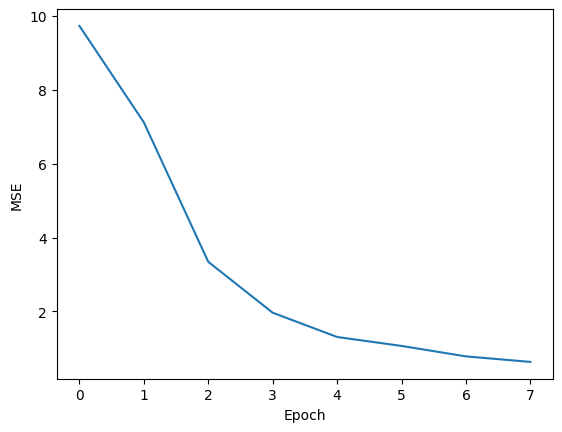

In [ ]:
# My implementation - with bias - without regularization
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sortedcontainers import SortedList

with open(LARGE_FILE_DIR + '/user2movie.json', 'rb') as f:
  user2movie = pickle.load(f)
with open(LARGE_FILE_DIR + '/movie2user.json', 'rb') as f:
  movie2user = pickle.load(f)
with open(LARGE_FILE_DIR + '/usermovie2rating.json', 'rb') as f:
  usermovie2rating = pickle.load(f)
with open(LARGE_FILE_DIR + '/usermovie2rating_test.json', 'rb') as f:
  usermovie2rating_test = pickle.load(f)



N = np.max(list(user2movie.keys())) + 1
# the test set may contain movies the train set doesn't have data on
m1 = np.max(list(movie2user.keys()))
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
print("N:", N, "M:", M)

training_ratings=[ usermovie2rating[i] for i in usermovie2rating]


if M > 2000:
  print("N =", N, "are you sure you want to continue?")
  print("Comment out these lines if so...")
  exit()

K = 10

W = np.random.rand(N, K)
b = np.random.rand(N)
U = np.random.rand(M, K)
c = np.random.rand(M)
mu = np.mean(training_ratings)
max_epoches=25
threashold=0.05

# calculate accuracy
def mse(p, t):
  p = np.array(p)
  t = np.array(t)
  return np.mean((p - t)**2)

def predict(i,j):
  # prediction = np.dot(W[i].T, U[j]) + b[i] + c[j] + mu
  # prediction = min(5, prediction)
  # prediction = max(0.5, prediction) # min rating is 0.5
  # return prediction
  return np.dot(W[i].T, U[j]) + b[i] + c[j] + mu

mse_history = []
def train():
  epoch=0
  prev_mse = 0
  while True:
    start_epoch = datetime.now()
    # update
    for i in range(N):
      # Updating w_i
      numerator = 0
      denominator = 0
      b_multiplier = 0
      for mj in user2movie[i]:
        try:
          numerator += np.dot((usermovie2rating[(i, mj)] - b[i] - c[mj] - mu), U[mj])
          denominator +=  np.dot(U[mj],  U[mj].T)
          b_multiplier += usermovie2rating[(i, mj)] - np.dot(W[i].T, U[mj]) - c[mj] - mu
        except Exception:
          pass
      W[i] = numerator / denominator
      # Updating b_i
      b[i] = b_multiplier / len(user2movie[i])

    for j in range(M):
      # Updating U_j
      numerator = 0
      denominator = 0
      c_multiplier = 0
      for ui in movie2user[j]:
        try:
          numerator += np.dot((usermovie2rating[(ui, j)] - b[ui] - c[j] - mu), W[ui])
          denominator +=  np.dot(W[ui],  W[ui].T)
          c_multiplier += usermovie2rating[(ui, j)] - np.dot(W[ui].T, U[j]) - b[ui] - mu
        except Exception:
          pass
      U[j] = numerator / denominator
      # Updating c_j
      c[j] = c_multiplier / len(movie2user[j])
    # predict
    pred=[ predict(i,j) for i,j in usermovie2rating]
    # evaluate
    pred_mse = mse(training_ratings, pred)
    print(f"Epoch: {epoch} - MSE: {pred_mse} - Took: {datetime.now() - start_epoch}")
    if np.abs(pred_mse - prev_mse) < threashold or epoch > max_epoches:
      return
    prev_mse = pred_mse
    mse_history.append(pred_mse)

train()

# Test
test_ratings=[ usermovie2rating_test[i] for i in usermovie2rating_test]
test_pred=[ predict(i,j) for i,j in usermovie2rating_test]
print('test mse:', mse(test_ratings, test_pred))

# Plot
plt.plot(mse_history)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

In [ ]:
# Lazy Programmer Implementation w/ bais and regularization
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime


with open(LARGE_FILE_DIR + '/user2movie.json', 'rb') as f:
  user2movie = pickle.load(f)
with open(LARGE_FILE_DIR + '/movie2user.json', 'rb') as f:
  movie2user = pickle.load(f)
with open(LARGE_FILE_DIR + '/usermovie2rating.json', 'rb') as f:
  usermovie2rating = pickle.load(f)
with open(LARGE_FILE_DIR + '/usermovie2rating_test.json', 'rb') as f:
  usermovie2rating_test = pickle.load(f)


N = np.max(list(user2movie.keys())) + 1
# the test set may contain movies the train set doesn't have data on
m1 = np.max(list(movie2user.keys()))
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
print("N:", N, "M:", M)


# initialize variables
K = 10 # latent dimensionality
W = np.random.randn(N, K)
b = np.zeros(N)
U = np.random.randn(M, K)
c = np.zeros(M)
mu = np.mean(list(usermovie2rating.values()))

# prediction[i,j] = W[i].dot(U[j]) + b[i] + c.T[j] + mu

def get_loss(d):
  # d: (user_id, movie_id) -> rating
  N = float(len(d))
  sse = 0
  for k, r in d.items():
    i, j = k
    p = W[i].dot(U[j]) + b[i] + c[j] + mu
    sse += (p - r)*(p - r)
  return sse / N


# train the parameters
epochs = 25
reg =20. # regularization penalty
train_losses = []
test_losses = []
for epoch in range(epochs):
  print("epoch:", epoch)
  epoch_start = datetime.now()
  # perform updates

  # update W and b
  t0 = datetime.now()
  for i in range(N):
    # for W
    matrix = np.eye(K) * reg
    vector = np.zeros(K)

    # for b
    bi = 0
    for j in user2movie[i]:
      r = usermovie2rating[(i,j)]
      matrix += np.outer(U[j], U[j])
      vector += (r - b[i] - c[j] - mu)*U[j]
      bi += (r - W[i].dot(U[j]) - c[j] - mu)

    # set the updates
    W[i] = np.linalg.solve(matrix, vector)
    b[i] = bi / (len(user2movie[i]) + reg)

    if i % (N//10) == 0:
      print("i:", i, "N:", N)
  print("updated W and b:", datetime.now() - t0)

  # update U and c
  t0 = datetime.now()
  for j in range(M):
    # for U
    matrix = np.eye(K) * reg
    vector = np.zeros(K)

    # for c
    cj = 0
    try:
      for i in movie2user[j]:
        r = usermovie2rating[(i,j)]
        matrix += np.outer(W[i], W[i])
        vector += (r - b[i] - c[j] - mu)*W[i]
        cj += (r - W[i].dot(U[j]) - b[i] - mu)

      # set the updates
      U[j] = np.linalg.solve(matrix, vector)
      c[j] = cj / (len(movie2user[j]) + reg)

      if j % (M//10) == 0:
        print("j:", j, "M:", M)
    except KeyError:
      # possible not to have any ratings for a movie
      pass
  print("updated U and c:", datetime.now() - t0)
  print("epoch duration:", datetime.now() - epoch_start)


  # store train loss
  t0 = datetime.now()
  train_losses.append(get_loss(usermovie2rating))

  # store test loss
  test_losses.append(get_loss(usermovie2rating_test))
  print("calculate cost:", datetime.now() - t0)
  print("train loss:", train_losses[-1])
  print("test loss:", test_losses[-1])


print("train losses:", train_losses)
print("test losses:", test_losses)

# plot losses
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime
from copy import deepcopy

with open(LARGE_FILE_DIR + '/user2movie.json', 'rb') as f:
  user2movie = pickle.load(f)
with open(LARGE_FILE_DIR + '/movie2user.json', 'rb') as f:
  movie2user = pickle.load(f)
with open(LARGE_FILE_DIR + '/usermovie2rating.json', 'rb') as f:
  usermovie2rating = pickle.load(f)
with open(LARGE_FILE_DIR + '/usermovie2rating_test.json', 'rb') as f:
  usermovie2rating_test = pickle.load(f)

N = np.max(list(user2movie.keys())) + 1
# the test set may contain movies the train set doesn't have data on
m1 = np.max(list(movie2user.keys()))
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
print("N:", N, "M:", M)


# convert user2movie and movie2user to include ratings
print("converting...")
user2movierating = {}
for i, movies in user2movie.items():
  r = np.array([usermovie2rating[(i,j)] for j in movies])
  user2movierating[i] = (movies, r)
movie2userrating = {}
for j, users in movie2user.items():
  r = np.array([usermovie2rating[(i,j)] for i in users])
  movie2userrating[j] = (users, r)

# create a movie2user for test set, since we need it for loss
movie2userrating_test = {}
for (i, j), r in usermovie2rating_test.items():
  if j not in movie2userrating_test:
    movie2userrating_test[j] = [[i], [r]]
  else:
    movie2userrating_test[j][0].append(i)
    movie2userrating_test[j][1].append(r)
for j, (users, r) in movie2userrating_test.items():
  movie2userrating_test[j][1] = np.array(r)
print("conversion done")

# initialize variables
K = 10 # latent dimensionality
W = np.random.randn(N, K)
b = np.zeros(N)
U = np.random.randn(M, K)
c = np.zeros(M)
mu = np.mean(list(usermovie2rating.values()))



def get_loss(m2u):
  # d: movie_id -> (user_ids, ratings)
  N = 0.
  sse = 0
  for j, (u_ids, r) in m2u.items():
    p = W[u_ids].dot(U[j]) + b[u_ids] + c[j] + mu
    delta = p - r
    sse += delta.dot(delta)
    N += len(r)
  return sse / N



# train the parameters
epochs = 25
reg = 20. # regularization penalty
train_losses = []
test_losses = []
for epoch in range(epochs):
  print("epoch:", epoch)
  epoch_start = datetime.now()
  # perform updates

  # update W and b
  t0 = datetime.now()
  for i in range(N):
    m_ids, r = user2movierating[i]
    matrix = U[m_ids].T.dot(U[m_ids]) + np.eye(K) * reg
    vector = (r - b[i] - c[m_ids] - mu).dot(U[m_ids])
    bi = (r - U[m_ids].dot(W[i]) - c[m_ids] - mu).sum()

    # set the updates
    W[i] = np.linalg.solve(matrix, vector)
    b[i] = bi / (len(user2movie[i]) + reg)

    if i % (N//10) == 0:
      print("i:", i, "N:", N)
  print("updated W and b:", datetime.now() - t0)


  # update U and c
  t0 = datetime.now()
  for j in range(M):
    try:
      u_ids, r = movie2userrating[j]
      matrix = W[u_ids].T.dot(W[u_ids]) + np.eye(K) * reg
      vector = (r - b[u_ids] - c[j] - mu).dot(W[u_ids])
      cj = (r - W[u_ids].dot(U[j]) - b[u_ids] - mu).sum()

      # set the updates
      U[j] = np.linalg.solve(matrix, vector)
      c[j] = cj / (len(movie2user[j]) + reg)

      if j % (M//10) == 0:
        print("j:", j, "M:", M)
    except KeyError:
      # possible not to have any ratings for a movie
      pass
  print("updated U and c:", datetime.now() - t0)
  print("epoch duration:", datetime.now() - epoch_start)


  # store train loss
  t0 = datetime.now()
  train_losses.append(get_loss(movie2userrating))

  # store test loss
  test_losses.append(get_loss(movie2userrating_test))
  print("calculate cost:", datetime.now() - t0)
  print("train loss:", train_losses[-1])
  print("test loss:", test_losses[-1])


print("train losses:", train_losses)
print("test losses:", test_losses)

# plot losses
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

### Probabilistic Matrix Factorization

Instead of saying $\hat R = W^TU$, let's instead say $\underline R$ is a random matrix and it comes from normal distribution

$$
\underline R \sim N(WU^T, \sigma^2) \\
r_{ij} \sim N(w_i^Tu_j, \sigma^2)
$$


#### Maximum likelihood estimation


To find the parameters of the probabilty distribution, we can use the **Maximum likelihood estimation**

Collect data from the distribution, maximize the likelihood function wrt parameters

$$
L = \prod_{i,j \in \Omega} \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left ( \frac{-1}{2\sigma^2}(r_{ij}-w_i^Tu_j)^2 \right ) \\[1cm]
W,U + \text{argmax}_{W,U}L \\
$$

\

**Maximing the Likelihood**

- Take the log of the likelihood
- Maximizing this is usually easier (and yields the same answer)
- This is just the negative of loss

$$
\log(L) = C - \sum_{i,j \in \Omega} \frac{1}{\sigma^2}(r_{ij}-w_i^Tu_j)^2
$$

#### MAP Estimation

Maximum a posteriori estimation, instead maximizing p(R) given W and U, we want to maximize P(W,U) given R

$$
\text{MLE}: p(R | W,U) \\
\text{MAP}: p(W,U | R) \\
$$

\

Using Bayes rule:
$$
p(W,U| R) = \frac{p(R|W,U)p(W)p(U)}{p(R)}
$$

- Thus, we must define the priors p(W) and p(U)
- Note: p(R) is a constant wrt W, U, can be dropped

$$
p(W) = N(0, \lambda^{-1}), p(U) = N(0,\lambda^{-1})\\
$$

**MAP Objective**

We want to take the log of this (Likelihood × priors)

$$
L = \prod_{i,j \in \Omega} \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left ( \frac{-1}{2\sigma^2}(r_{ij}-w_i^Tu_j)^2 \right ) \\[1cm]
W,U + \text{argmax}_{W,U}L \times
\frac{\lambda}{\sqrt{2\pi}}e^{-\frac{\lambda}{2}\|W\|_F^2}
\frac{\lambda}{\sqrt{2\pi}}e^{-\frac{\lambda}{2}\|U\|_F^2} \\[2cm]
L = C_0 - C_1 \sum_{i,j \in \Omega} (r_{ij}-w_i^Tu_j)^2 - \frac{\lambda}{2}\|W\|_F^2-\frac{\lambda}{2}\|U\|_F^2 \\
$$

This is just regularized matrix factorization (constants are irrelevant)


### Bayesian Matrix Factorization

Summarize the Bayesian approach as "everything is a random variable", eve our prediction $r_{ij}$


In Bayesian paradigm, we don't want point estimates, but probability distributions. that means we don't want the argmax for W,U that maximze posterior, Instead we want to find this posterior distribution or at very least take samples from it.

$$
p(W,U| R) = \frac{p(R|W,U)p(W)p(U)}{p(R)}
$$


**Goal**

we want to predict ratings, i.e. $p(r_{ij} | R), where R is the data we collected so far


Expected Value

$$
E(x) = \int^{+\infty}_{-\infty} x \ p(x) \ dx \\
$$

How about $r_{ij} | R$:

$$
E(r_{ij} | R) = \int r_{ij} \ p(r_{ij} | R) \ dr_{ij} \\
$$

$$
E(r_{ij} | R) = \int r_{ij} \ p(r_{ij} | W,U)p(W,U | R) dWdUdr_{ij} \\
$$

- $p(r_{ij} | W,U)$ Original Guassian
- $p(W,U | R)$ Posterior

If we isolate terms containing $r_{ij}$, we see it's just another expected value.

$$
\int r_{ij} \ p(r_{ij} | W,U) dr_{ij} = E(r_{ij} | W,U) = w_i^Tu_j \\[1cm]
r_{ij} \sim N(w_i^Tu_j, \sigma^2)
$$

Expected value is the same as mean of distribution.

Pluging them back to integral


$$
E(r_{ij} | R) = \int w_i^Tu_j \ p(W,U | R) \ dWdU \\
E(r_{ij} | R) = E(w_i^Tu_j | R) \\
$$

We can approximate this expected value, a mean can be approximated by the sample mean, if we sample from the correct distribution.
- MCMC - Gibbs Sampling

$$
E(w_i^Tu_j | R) \approx \frac{1}{T} \sum_{t=1}^T w_i^{(t)T}u_i^{(t)}
$$

### Keras Implementation

#### Matrix Factorization Keras

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam

# load in the data
df = pd.read_csv(LARGE_FILE_DIR + '/edited_rating.csv')

N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies

# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

# initialize variables
K = 10 # latent dimensionality
mu = df_train.rating.mean()
epochs = 15
reg = 0. # regularization penalty


# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(u) # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(m) # (M, 1, K)

u_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(u) # (N, 1, 1)
m_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(m) # (M, 1, 1)
x = Dot(axes=2)([u_embedding, m_embedding]) # (N, 1, 1)


x = Add()([x, u_bias, m_bias])
x = Flatten()(x) # (N, 1)

model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(learning_rate=0.08, momentum=0.9),
  metrics=['mse'],
)

r = model.fit(
  x=[df_train.userId.values, df_train.movie_idx.values],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.userId.values, df_test.movie_idx.values],
    df_test.rating.values - mu
  )
)


# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.plot(r.history['mean_squared_error'], label="train mse")
plt.plot(r.history['val_mean_squared_error'], label="test mse")
plt.legend()
plt.show()

#### Deep Learning Keras - Dense

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

# load in the data
df = pd.read_csv(LARGE_FILE_DIR + '/edited_rating.csv')

N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies

# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

# initialize variables
K = 10 # latent dimensionality
mu = df_train.rating.mean()
epochs = 15
# reg = 0.0001 # regularization penalty


# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K)(u) # (N, 1, K)
m_embedding = Embedding(M, K)(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
x = Concatenate()([u_embedding, m_embedding]) # (N, 2K)

# the neural network
x = Dense(400)(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(100)(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
x = Dense(1)(x)

model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(learning_rate=0.08, momentum=0.9),
  metrics=['mse'],
)

r = model.fit(
  x=[df_train.userId.values, df_train.movie_idx.values],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.userId.values, df_test.movie_idx.values],
    df_test.rating.values - mu
  )
)


# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.plot(r.history['mean_squared_error'], label="train mse")
plt.plot(r.history['val_mean_squared_error'], label="test mse")
plt.legend()
plt.show()

#### Deep Learning Keras - Residuals

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

# load in the data
df = pd.read_csv(LARGE_FILE_DIR + '/edited_rating.csv')

N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies

# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

# initialize variables
K = 10 # latent dimensionality
mu = df_train.rating.mean()
epochs = 15
reg = 0. # regularization penalty


# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K)(u) # (N, 1, K)
m_embedding = Embedding(M, K)(m) # (N, 1, K)


##### main branch
u_bias = Embedding(N, 1)(u) # (N, 1, 1)
m_bias = Embedding(M, 1)(m) # (N, 1, 1)
x = Dot(axes=2)([u_embedding, m_embedding]) # (N, 1, 1)
x = Add()([x, u_bias, m_bias])
x = Flatten()(x) # (N, 1)


##### side branch
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
y = Concatenate()([u_embedding, m_embedding]) # (N, 2K)
y = Dense(400)(y)
y = Activation('relu')(y)
# y = Dropout(0.5)(y)
y = Dense(1)(y)


##### merge
x = Add()([x, y])

model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(learning_rate=0.08, momentum=0.9),
  metrics=['mse'],
)

r = model.fit(
  x=[df_train.userId.values, df_train.movie_idx.values],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.userId.values, df_test.movie_idx.values],
    df_test.rating.values - mu
  )
)


# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.plot(r.history['mean_squared_error'], label="train mse")
plt.plot(r.history['val_mean_squared_error'], label="test mse")
plt.legend()
plt.show()

## AutoRec

Autoencoders to recommendation.

A neural network that just reproduces its own input

$$
\text{Error} = (\text{output} - \text {input})^2
$$

Autoencoders can be used to convert a noisy image/image with missing spots to a full image. In our case, we can simply treat the user-items matrix as if ti were an samples-features data matrix (with tons of missing values).
- Each user is a sample
- EaCh feature is an item rating

We can flip it as well, but this way works better.

AutoRec learns faster than other methods, DDN that looks at each rating individually loop a lot more samples per epoch comparing to only having users.


### Calculating Cost

An array can't contain "missing" values just zeros (In our case, all ratings are between 0.5-5.0)

Must make sure autoencoder doesn't literally try to reproduce input x (otherwise, it will try to reproduce the zeros too!)

Solution, we need a cosst function:

$$
J = \frac{1}{|\Omega|} \sum_{i=1}^N\sum_{j=1}^M m_{ij}(r_{ij} - \hat r_{ij})^2 \\[1cm]
m_{ij} = 1 \text{ if } (i,j) \in \Omega \text{ else } 0
$$

**Test MSE**

Normally, the test error is calculated from the test input. Doesn't make sense here. The "test set" is an N×M matrix of the ratings we're trying to predict. We can't use the test ratings to predict themselves.

The train ratings should predict the test ratings

### Python Implementation

**Sparse Preprocess Python**

We can't fit the N×M matrix in the memeory.

Scipy supports a spacial format "sparse matrix"
- lil_matrix
- csr_matrix
- coo_matrix

Keras doesn't recognize sparse matrices, so we'd need a custom generator that densify only a batch at a time.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.sparse import lil_matrix, csr_matrix, save_npz, load_npz

# load in the data
df = pd.read_csv(LARGE_FILE_DIR + '/edited_rating.csv')

N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies

# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

A = lil_matrix((N, M))
print("Calling: update_train")
count = 0
def update_train(row):
  global count
  count += 1
  if count % 100000 == 0:
    print("processed: %.3f" % (float(count)/cutoff))

  i = int(row.userId)
  j = int(row.movie_idx)
  A[i,j] = row.rating
df_train.apply(update_train, axis=1)

# mask, to tell us which entries exist and which do not
A = A.tocsr()
mask = (A > 0)
save_npz(LARGE_FILE_DIR + "/Atrain.npz", A)

# test ratings dictionary
A_test = lil_matrix((N, M))
print("Calling: update_test")
count = 0
def update_test(row):
  global count
  count += 1
  if count % 100000 == 0:
    print("processed: %.3f" % (float(count)/len(df_test)))

  i = int(row.userId)
  j = int(row.movie_idx)
  A_test[i,j] = row.rating
df_test.apply(update_test, axis=1)
A_test = A_test.tocsr()
mask_test = (A_test > 0)
save_npz(LARGE_FILE_DIR + "/Atest.npz", A_test)

AutoRec

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.sparse import save_npz, load_npz

import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dropout, Dense
from keras.regularizers import l2
from keras.optimizers import SGD

# config
batch_size = 128
epochs = 20
reg = 0.0001

A = load_npz(LARGE_FILE_DIR + "/Atrain.npz")
A_test = load_npz(LARGE_FILE_DIR + "/Atest.npz")
mask = (A > 0) * 1.0
mask_test = (A_test > 0) * 1.0

# make copies since we will shuffle
A_copy = A.copy()
mask_copy = mask.copy()
A_test_copy = A_test.copy()
mask_test_copy = mask_test.copy()

N, M = A.shape
print("N:", N, "M:", M)
print("N // batch_size:", N // batch_size)

# center the data
mu = A.sum() / mask.sum()
print("mu:", mu)



# build the model - just a 1 hidden layer autoencoder
i = Input(shape=(M,))
# bigger hidden layer size seems to help!
x = Dropout(0.7)(i)
x = Dense(700, activation='tanh', kernel_regularizer=l2(reg))(x)
# x = Dropout(0.5)(x)
x = Dense(M, kernel_regularizer=l2(reg))(x)



def custom_loss(y_true, y_pred):
  mask = K.cast(K.not_equal(y_true, 0), dtype='float32')
  diff = y_pred - y_true
  sqdiff = diff * diff * mask
  sse = K.sum(K.sum(sqdiff))
  n = K.sum(K.sum(mask))
  return sse / n


def generator(A, M):
  while True:
    A, M = shuffle(A, M)
    for i in range(A.shape[0] // batch_size + 1):
      upper = min((i+1)*batch_size, A.shape[0])
      a = A[i*batch_size:upper].toarray()
      m = M[i*batch_size:upper].toarray()
      a = a - mu * m # must keep zeros at zero!
      # m2 = (np.random.random(a.shape) > 0.5)
      # noisy = a * m2
      noisy = a # no noise
      yield noisy, a


def test_generator(A, M, A_test, M_test):
  # assumes A and A_test are in corresponding order
  # both of size N x M
  while True:
    for i in range(A.shape[0] // batch_size + 1):
      upper = min((i+1)*batch_size, A.shape[0])
      a = A[i*batch_size:upper].toarray()
      m = M[i*batch_size:upper].toarray()
      at = A_test[i*batch_size:upper].toarray()
      mt = M_test[i*batch_size:upper].toarray()
      a = a - mu * m
      at = at - mu * mt
      yield a, at



model = Model(i, x)
model.compile(
  loss=custom_loss,
  optimizer=SGD(learning_rate=0.08, momentum=0.9),
  # optimizer='adam',
  metrics=[custom_loss],
)


r = model.fit(
  generator(A, mask),
  validation_data=test_generator(A_copy, mask_copy, A_test_copy, mask_test_copy),
  epochs=epochs,
  steps_per_epoch=A.shape[0] // batch_size + 1,
  validation_steps=A_test.shape[0] // batch_size + 1,
)
print(r.history.keys())



# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.plot(r.history['custom_loss'], label="train mse")
plt.plot(r.history['val_custom_loss'], label="test mse")
plt.legend()
plt.show()

## RBMs

Restricted Boltzmann Machines, RBMs, for recommender systems.

 A single layer of nueral network that doesn't have any output, In other words, if we take a neural network and we just look at a single block connecting some input to some output, this is the basic structure of an RBM.

 - Visible - v
 - Hidden - h
 - You can go forward and backward
  - Can calculate h from v(v→h)
  - Can also calculate v from h!(h→v)



### Bernoulli RBMs

For most discussions about RBMs, we are typically working with Bernoulli RBMs, that means we assume that the **input can only be zero or one**, and we assume that the hidden values can also only take on the **values zero or one**.

this constraint is usually relaxed

**Bernoulli distribution**

a Bernoulli distribution is a distribution that describes a random variable that can only take on the values zero or one. Eg coin toss.

Nothing but a neural network layer with a sigmoid activation function


#### Calculation RBM

**V → H**

Scalar Form:

$$
p(h_j = 1 | v) = \sigma(\sum_{i=1}^D W_{ij}v_i + c_j) \quad i = 1 \dots D \quad, j= 1\dots M \\
\text{len}(v)=D \quad \text{len}(h) = M \\
$$

Vector Form:

$$
p(h=1|v) = \sigma(W^Tv+c)
$$

**H → V**

$$
p(v_i = 1 | h) = \sigma(\sum_{j=1}^M W_{ij}h_j + b_i) \quad i = 1 \dots D \quad, j= 1\dots M \\
$$

Vector Form:

$$
p(v=1|h) = \sigma(Wh+b)
$$

- b and c are bias vectors
- We only get probabilties




**Relaxing the Bernoulli constraint**

Scale the values to 0…1, round all values to 0 or 1. It's also possible to not round the numbers to 0 and 1

Also can be done for h, In RBM, we want to go to h from v and back to v from h. In other words, it's calculating a distribution for V given an observed V. We can use the probabilities for H itself

$$
\tilde h = p(h=1|v) = \sigma (W^Tv+c) \\
p(v' = 1|h ) = \sigma (W\tilde h + b) \\
$$

Similar to autoencoders.

If we go from v → h → v' in RBM, the cross entropy ("distance" between v and v') will go down as we train, even though we don't optimize it!

$$
h = \sigma(W^Tv+c) \\
v' = \sigma(Wh+b)
$$

**Motivation Behind RBMs**

What if we create a neural network without imposing any structure on it? Everything connected to everything else.

#### Boltzmann Machines

It has been done, and it's called **Boltzmann Machines**. In a Boltzmann machine some units can be hidden and some can be visible.

Comparing to our brain, You can think of the visible neurons as neurons that are conencted to outside world (our senses), you can think of hidden nuerons as all other neurons, neurons that are not directly sensing things from the environment, but they are still connected to other neurons that are either directly or indirectly.

\

**Boltzmann Machine in Physics**

- Energy of a Boltzmann machine
- Goal is to find some equilibrium (E.g. thermal equilibrium)
- Looks like a neural network equation! Has a weight matrix, bias term

$$
E = - \left ( \sum_{i,j} W_{ij} s_i s_j + \sum_i b_is_i \right ) \\
$$

\



##### Training a Boltzmann Machine

Boltsmann machines are difficult to train, Only works on trivial examples.

*Restricted Boltzmann machines* do train well, and scale up to non-trivial problems

$$
G = \sum_v P^+ (v) \ln \left ( \frac{P^+(v)}{P^-(v)} \right )
$$

In *Restricted Boltzmann machines*, we restricted which nodes to be connected.

Move all hiddens to one side and visibles to the other side. Discard any connections between hidden-hidden and visible-visible.

**Energy of an RBM**

$$
E(v,h) = - \left(\sum_{i=1}^D\sum_{j=1}^M W_{ij} v_i h_j + \sum^D_{i=1} b_iv_i + \sum_{i=1}^M c_jh_j \right)\\[1cm]
\text{In deep learning} \\
E(v,h) = - (v^TWh+ b^Tv+ c^Th)
$$

**Probability Model**

$$
p(v,h) \propto e^{-E(v,h)} \\
p(v,h) = \frac{1}{Z} e^{-E(v,h)} \\
Z = \sum_v\sum_h e^{-E(v,h)} \\
\text{So that: } \sum_v\sum_h p(v,h) = 1
$$

*Why*?

Statistical mechanics

General outline: $p_i$ is the probability that a system is in microstate with energy $E_i$

$T$ = temperature, $Z$ = partition function


$$
p_i \propto e^{\frac{-E_i}{kT}} \\
p_i = \frac{1}{Z} e^{\frac{-E_i}{kT}} \\
Z = \sum_i e^{\frac{-E_i}{kT}} \\
$$



### Intractability

If v has length D and h has length M, the number of total possiblities is: $2^D \times 2^M = 2^{D+M}$

$$
p(v,h)=\frac{1}{Z} e^{-E(v,h)} \\
Z = \sum_v\sum_h e^{-E(v,h)} \\
$$

### RBM Formula

Statistical mechanics leads us back to the equations we already know

Driving from Bayes rule:

*Marginals*

$$
p(v|h) = p(v,h) / p(h) \\
p(h|v) = p(v,h) / p(v) \\[1cm]
p(v) = \sum_hp(v,h)\quad\quad p(h) = \sum_vp(v,h) \\
$$

*Plug in what we know*

$$
p(v,h) = \frac{1}{Z} \exp( v^TWh + b^Tv + c^Th) \\
p(v) = \sum_h\frac{1}{Z} \exp( v^TWh + b^Tv + c^Th) \\
p(h|v) = \frac{\exp( v^TWh + b^Tv + c^Th)}{\sum_h \exp( v^TWh + b^Tv + c^Th)}\\
$$

*Simplify*

denominator is simply another normalizing constant

$$
p(h|v) = \frac{1}{Z'} \exp\left ( v^TWh + b^Tv + c^Th \right )\\
$$

*Write i in scalar form*

$$
p(h|v) = \frac{1}{Z'} \exp \left (
\sum_{i=1}^D\sum_{j=1}^M W_{ij}v_ih_j +
\sum_{i=1}^D b_iv_i +
\sum_{j=1}^M c_jh_j
\right )\\
$$

*Exponent rule*

exp(A+B) = exp(A)exp(B)

$$
p(h|v) = \frac{1}{Z'} \exp \left (
\sum_{i=1}^D b_iv_i \right )
\prod_{j=1}^M \exp \left (
\sum_{i=1}^D
 W_{ij}v_ih_j +
 c_jh_j
\right )\\
$$



*Absorb Normalizing Constant*

Anything that doesn't depend on h can be absorbed. p(h|v) only depends on h, so anything else can be absorbed to normalizing constant

$$
p(h|v) = \frac{1}{Z''}
\prod_{j=1}^M \exp \left (
\sum_{i=1}^D
 W_{ij}v_ih_j +
 c_jh_j
\right )\\
$$

*Factor out $h_j$*

$$
p(h|v) = \frac{1}{Z''}
\prod_{j=1}^M \exp \left (
h_j \left \{
\sum_{i=1}^D
 W_{ij}v_i +
 c_j
 \right \}
\right )\\
$$

*Independence*

If A and B are independent, then p(A,B) = p(A)p(B)

p(h|v) factors out where each $p(h_j|v)$ is independent of the others. Hidden units can't connect to other hidden units.

$$
p(h_j|v) = \frac{1}{Z'''} \exp \left (
h_j \left \{
\sum_{i=1}^D
 W_{ij}v_i +
 c_j
 \right \}
\right )\\
$$

*Bernoulli rule*

$h_j$ can only ever be 0 or 1

$$
p(h_j = 1|v) = \frac{1}{Z'''} \exp \left (
\sum_{i=1}^D
 W_{ij}v_i +
 c_j
\right )
\\p(h_j=0|v) = \frac{1}{Z'''}
$$



*Solve*

$$
p(h_j = 1|v) + p(h_j = 0|v)  = 1 \\
\frac{1}{Z'''} \exp \left (\sum_{i=1}^DW_{ij}v_i +c_j\right ) + \frac{1}{Z'''} = 1 \\
Z''' = 1 + \exp\left (\sum_{i=1}^DW_{ij}v_i +c_j\right )
$$

*Plug back to original equation*

$$
p(h_j = 1|v)  = \frac{
\exp\left (\sum_{i=1}^DW_{ij}v_i +c_j\right )
}{
1 + \exp\left (\sum_{i=1}^DW_{ij}v_i +c_j\right )
}  =
\sigma\left (\sum_{i=1}^DW_{ij}v_i +c_j\right )
$$

\

*Full Vector Form*

$$
p(h = 1|v)  = \sigma\left ( W^Tv + c \right )
$$


Equations are symmetric in v and h


# Resources

- [Recommender Systems and Deep Learning in Python by LazyProgrammer](https://deeplearningcourses.com/c/recommender-systems)